In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli

**Tópicos**:
- Testes de Hipótese (Parte II)
     - Metodologia Genérica do Teste de Hipótese
     - Teste para a média com variância conhecida
     - Teste para a média com variância desconhecida
     - Teste t para 2 amostras 
     - Teste de correlação:
         - Pearson
         - Spearman
     - Teste de Dependência 


### Metodologia Genérica do Teste de Hipótese

* Passo 1: Fixar as hipóteses Nula e Alternativa

No primeiro passo, temos que definir se iremos realizar um tese unilateral ou bilateral.

unilateral será quando quisermos testar se a estatística da amostra é maior ou menor que o parâmetro da população, isoladamente.

bilateral será quando quisermos testar que a estatística da amostra é diferente, sendo as condições de maior ou menor testadas simultaneamente.

![](https://oestatistico.com.br/wp-content/uploads/2016/01/poder-teste-oestatistico.jpg)

* Passo 2: Fixar o nível de significância, alfa

* Passo 3: Calcular a estatística de interesse a partir de uma amostra.

* Passo 4: Calcular o p-valor para essa estatística e decidir qual hipótese se mantém.

## Exemplos Práticos

### Teste para a Média Com Variância Conhecida

Uma máquina que enche pacotes de café com variância de 400g2 estava regulada para encher pacotes com 500g. Você decide coletar uma amostra de 16 pacotes e checar se a máquiina ainda está regulada. A amostra de 16 pacotes possui média de 492g. Baseando-se nisso, você para a produção de café para regular a máquina?

In [3]:
# trazendo dados
# variancia
var = 400
# media
u = 500
# numero de amostras
n = 16
# media amostral
ua = 492

Vamos definir nossas hipóteses

**H0**: u = 500g<br>
**H1**: u != 500g

Do teorema do limite central, temos que:

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

Como temos n = 16:

In [4]:
# desvio padrao amostral
desv_a = np.sqrt(var/n)

In [5]:
desv_a

5.0

Então, nossa distribuição amostral da média tem média 500 e desvio padrão 5.

Vamos fixar nosso nível de significância em 0.01. Note que é um teste bilateral.

Agora precisamos calcular a probabilidade (p valor) de encontrarmos um valor de média > 492 ou <492 , numa distribuição de média 500 e desvio padrão 5. Esse será nosso p-valor.

Primeiro, iremos calcular a probabilidade de ser < 492.

Vamos transformar nosso 492 em Z Score e calcular a probabilidade usando o scipy.

In [6]:
z_492 = (ua - u)/desv_a

In [7]:
z_492

-1.6

Como o teste é bilateral, teremos que dividir a área de 1% (nível de significância em 2). Para cada lado, precisaremos encontrar o Z score equivalente.

Para calcular Z a esquerda, precisaremos descobrir que valor de Z nos traz 0.5% dos dados a esquerda.

In [8]:
Z_esquerda = stats.norm.ppf(0.005)

In [9]:
Z_esquerda

-2.575829303548901

Como  são sempre simétricos, Z à direita será igual a Z_esquerdo, porém positivo.

In [10]:
Z_direita = -1*Z_esquerda

Note que a região crítica do teste é aquela em que <= -2.57 e >= 2.57

Nosso Z_492, porém, vale -1.6. Ou seja, é maior que -2.57 e menor que 2.57. Sendo assim, não cai dentro da região crítica.

Ou seja, cai dentro da região de aceitação do teste, indicando que devemos aceitar a hipótese nula, nesse caso e afirmar que

Vamos calcular o p valor?

In [11]:
p_valor = stats.norm.cdf(-1.6)

In [12]:
p_valor*2

0.10959858339911595

Note que 0.10959 é maior que 0.005, que é a área da região crítica à esquerda.

Dessa forma, quando p-valor > nível de significância, não rejeitamos a hipótese nula.

Conclusão: Não parar a produção

### Teste para a Média com Variância Desconhecida

Esse estudo de caso parece mais realista, pois na prática é muito difícil que conheçamos a variância da população. Normalmente, conhecemos a variância da amostra.

Aqui, em vez de utilizar a distribuição Z, trabalharemos com a distribuição T de Student. 

A distribuição t de Student parecida com a distribuição normal. Quando n tende a infinito, ela tende a ser uma distribuição normal. Na prática, quando não conhecemos a variância populacional, podemos utilizar a variância amostral. Quando n < 30, usamos a distribuição de T Student (mais adequada para amostras menores). 

![](https://www.researchgate.net/profile/Zexun_Chen/publication/321085266/figure/fig1/AS:631660630507553@1527611038596/Density-of-the-Student-t-distribution-for-1-2-5-and-10-degrees-of-freedom-compared-to.png)

Como o t de student é a mesma coisa do teste z, que aplicamos anteriormente, para n muito alto, podemos usar sempre o teste t para ambas as situações.

**Exemplo Prático**

Um fabricante de cigarros afirma que seus cigarros não contêm mais que 30 mg de nicotina. Um fiscal do ministério da saúde coleta 25 cigarros para análise. Ao analisá-los ele identifica que a média de nicotina na amostra é de 31.5 mg e o desvio padrão igual a 3mg.

Admitindo um nível de confiança de 95%, devemos ou não multar a fábrica de cigarros?

![](https://cdn-media-1.freecodecamp.org/images/1*frSLeAx5ObJWzD3L6a7Szw@2x.png)

In [13]:
# média da amostra
u_amostra = 31.5
# desvio padrão da amostra
std_amostra = 3
# média da população
u_pop = 30
# número de elementos na amostra
n=25

In [14]:
# Cálculo de t 
t_direita = (u_amostra-u_pop)/(std_amostra/np.sqrt(25))

In [15]:
t_direita

2.5

Qual estatística t corresponde a um nível de significância de 5%?

In [16]:
alfa = 0.05
stats.t.ppf(alfa, df=24)

-1.7108820799094282

lembre-se que a função ppf retornaa a área (probabilidade) à esquerda de t isso significa que 5% dos nossos dados na distribuição t estão abaixo de t = -1.71. Porém, nosso teste é a direita. Então, precisamos descobrir qual valor de t deixa 95% à esquerda e 5% à direita.

In [17]:
stats.t.ppf(0.95, df=24)

1.7108820799094275

Note que é exatamente o simétrico para alfa = 0.05.

No nosso caso, vemos que o t_direita é maior que o t que delimita a região crítica, indicando que a estatística do teste está dentro da região crítica. Assim, podemos concluir que a hipótese nula deve ser rejeitada.

Por fim, vamos calcular o p-valor.

O p valor é a probabilidade de observarmos um valor de t maior ou igual ao que encontramos. Novamente, vamos lembrar que a função só calcula a probabilidade para valores à esquerda. Então precisamos ou calcular usando o simétrico de t. 

In [18]:
stats.t.cdf(x=-t_direita, df=24) # df é o grau de liberdade

0.009827087558289377

Como p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula e a empresa de cigarro deve ser multada.

**Vamos ver a implementação do teste T  de uma maneira mais direta**

Por padrão, o teste t do ```scipt.stats``` é bilateral, ou seja, sua hipótese nula é que as médias são <i>iguais</i> e sua hipótese alternativa é de que as médias são <i>diferentes</i>

In [19]:
# criando distribuição normal com média 5
np.random.seed(10)
rvs = stats.norm.rvs(loc=5, scale=10, size=(50))

In [20]:
media_teste = 5
t_bi, p_bi = stats.ttest_1samp(rvs, media_teste)

In [21]:
# Estatística t
t_bi

0.7962654899482874

In [22]:
# p valor
p_bi

0.42971877541279346

Assumindo um alfa de 0.05, nós aceitaríamos a hipótese nula de que a média da população realmente é 5.

Mas e se quiséssemos fazer um teste unilateral??

Vamos ver a média da amostra

In [23]:
# média da amostra
rvs.mean()

6.024862201673477

A média da amostra é 6.024

Vamos testar a hipótese de que H0: médias iguais e H1: média > 5

In [25]:
t_uni = (rvs.mean() - 5)/(rvs.std(ddof=1)/np.sqrt(50))

A função abaixo nos retorna a probabilidade de termos um t < t_raiz

In [26]:
stats.t.cdf(t_uni, df=49)

0.7851406122936033

Para encontrarmos a probabilidade de t >= t_raiz, subtraímos o resultado acima de 1.

In [27]:
1 - stats.t.cdf(t_uni, df=49)

0.21485938770639668

Ou seja, há uma probabilidade de 21.48% de observarmos um valor de t >= a t_raiz

Como p-valor > alfa, não rejeitamos a hipótese nula.

Num teste bilateral, o <i>p-valor é 2 vezes o p-valor do teste unilateral</i>. Dessa forma, chegaríamos ao mesmo resultado, dividindo o p-valor do teste bilateral por 2.

In [28]:
p_bi/2

0.21485938770639673

### Teste t para 2 amostras

Até agora temos considerado uma única população e tentamos realizar uma inferência para esta. Agora veremos um exemplo de teste aplicado à duas populações.

No dia a dia, independente de sermos cientistas de dados ou não, nos deparamos com questões do tipo: A campanha A convertou mais que a campanha B? O medicamento A é mais eficaz que o medicamento B?

Isso equivale a comparar dois conjuntos de informações resultantes das medidas obtidas  de dois experimentos. De maneira geral, um primeiro grupo, A, é dado como grupo de controle (ex: grupo que não recebeu uma campanha) e é comparado a um grupo B (ex:grupo que recebeu a campanha) o qual recebe um tratamento (aplicação de um medicamento, campanha, entre outros).

OBS: O tratamento matemático desse tipo de teste é mais complexo e exigira mais aulas. Assim, nos limitaremos a conhecer a aplicação desse tipo de teste no Python.

In [29]:
# extraindo 2 amostras 
p_list = []
np.random.seed(123)
for i in np.arange(0,50000):
    a1 = stats.norm.rvs(loc=1500, scale=150, size=50)
    a2 = stats.norm.rvs(loc=1500, scale=100, size=50)
    t, p = stats.ttest_ind(a1,a2)
    p_list.append(p)

In [30]:
(np.array(p_list) <= 0.05).sum()/len(p_list)

0.05024

In [31]:
np.random.seed(51)
a1 = stats.norm.rvs(loc=1700, scale=150, size=50)
a2 = stats.norm.rvs(loc=1500, scale=100, size=50)

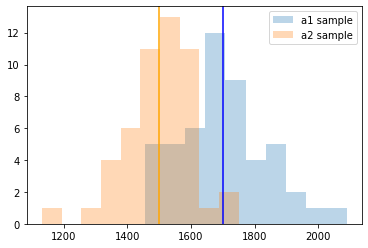

In [32]:
plt.hist(a1, label='a1 sample', alpha=0.3)
plt.axvline(a1.mean(),color= 'blue')
plt.axvline(a2.mean(), color='orange')
plt.hist(a2, label='a2 sample', alpha=0.3)
plt.legend()
plt.show()

In [33]:
t, p = stats.ttest_ind(a1,a2)

In [34]:
p

1.2495036718593313e-12

Rejeitamos a hipótese nula de que as distribuições tem mesma média.

### Teste de correlação

Utilizando o teste para a correlação vamos, antes de utilizar nossas features em um modelo, testar se são estatisticamente significantes.

Correlações podem enganar

Note que a correlação vai estabilizando para o valor esperado de 0, já que geramos um dataset randômico

Vamos extrair as correlações de pearson para as colunas loan_status, terms e age

Se estamos construindo um modelo preditivo, é interessante procurar por associações e correlação com o target

### Teste de chi2